In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')

In [50]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [51]:
df.shape

(500, 4)

In [52]:
df.isnull()

,Gender,Height,Weight,Index
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
495,False,False,False,False
496,False,False,False,False
497,False,False,False,False
498,False,False,False,False


In [53]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [54]:
min_h=df['Weight'].min()

In [55]:
min_h

50

In [56]:
max_h=df['Weight'].max()

In [57]:
max_h

160

In [58]:
range_of_weight=max_h-min_h


In [59]:
range_of_weight

110

In [60]:
num_records=df.shape[0]

In [61]:
num_records

500

In [62]:
height_data=df[['Height']].copy()

In [63]:
height_data.head()

,Height
0,174
1,189
2,185
3,195
4,149


In [64]:
weight_data=df[['Weight']].copy()

In [65]:
weight_data

,Weight
0,96
1,87
2,110
3,104
4,61
...,...
495,153
496,121
497,136
498,95


In [66]:
counts=[1]* num_records
height_data['counts_height']=counts
weight_data['counts_weight']=counts


In [67]:
weight_data=weight_data.sort_values('Weight')
weight_data.head()

,Weight,counts_weight
85,50,1
269,50,1
150,50,1
492,50,1
99,50,1


In [70]:
height_data=height_data.sort_values('Height')
height_data.head(10)

,Height,counts_height
0,140,8
1,141,8
2,142,9
3,143,3
4,144,5
5,145,9
6,146,9
7,147,7
8,148,5
9,149,5


In [69]:
height_data=height_data.groupby('Height',as_index=False).count()
height_data.head(10)

,Height,counts_height
0,140,8
1,141,8
2,142,9
3,143,3
4,144,5
5,145,9
6,146,9
7,147,7
8,148,5
9,149,5


### calculating cumulative counts

In [71]:
height_data['cumcounts_height']=height_data['counts_height'].cumsum()

In [72]:
height_data.head()

,Height,counts_height,cumcounts_height
0,140,8,8
1,141,8,16
2,142,9,25
3,143,3,28
4,144,5,33


In [73]:
weight_data['cumcounts_weight']=weight_data['counts_weight'].cumsum()

In [74]:
weight_data.head()

,Weight,counts_weight,cumcounts_weight
85,50,1,1
269,50,1,2
150,50,1,3
492,50,1,4
99,50,1,5


## Calculating Quantile information 

In [95]:
q1_height=df['Height'].quantile(.25)

In [96]:
q1_height

156.0

In [97]:
q3_height=df['Height'].quantile(.75)


In [98]:
q3_height

184.0

In [99]:
iqr_height=q3_height-q1_height

In [100]:
iqr_height


28.0

[]

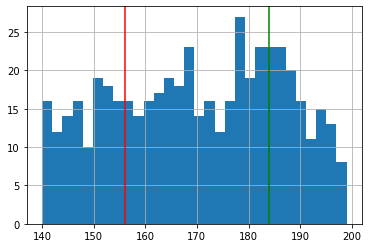

In [105]:
df['Height'].hist(bins=30)
plt.axvline(q1_height,color='r',label='Q1')
plt.axvline(q3_height,color='g',label='Q3')
plt.plot()

## skewness and kurtosis

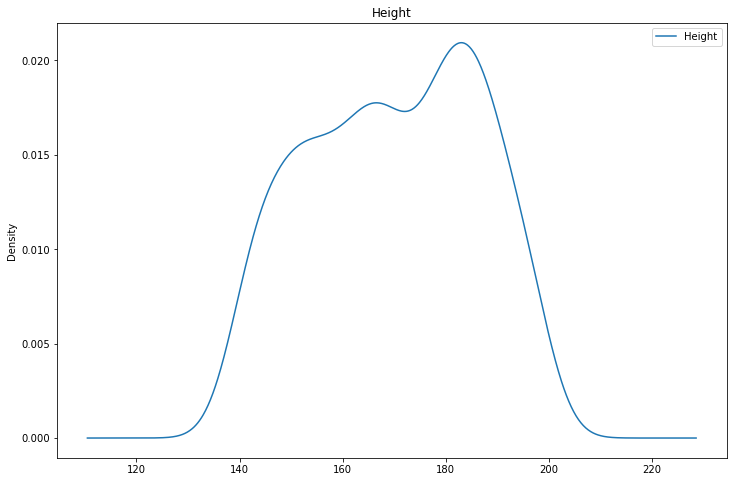

In [106]:
df[['Height']].plot(kind='kde',title='Height',figsize=(12,8))

In [107]:
df['Height'].skew()

-0.12191368980139153

In [108]:
df['Weight'].skew()

-0.037692236922098034